# The Centralized RBC Model with Labor with Durable and Nondurable Consumption Goods

In this project, we will simulate the dynamic equilibrium of a centralized (household makes their own decision) RBC model.
As usual, the model features an infinitely-lived household that chooses consumption, labor,
and capital accumulation to maximize the present value of its lifetime utility. However, the
household also chooses an amount of a durable consumption good to obtain. The durable
consumption good provides utility and gradually depreciates over time so it provides value
over time.

# Background

A representative household lives for an infinite number of periods. The expected present
value of lifetime utility to the household from consuming nondurable goods C$_{0}$, C$_{1}$, C$_{2}$,...,
consuming durable goods D$_{0}$, D$_{1}$, D$_{2}$,..., and working L$_{0}$, L$_{1}$, L$_{2}$,...is denoted by U$_{0}$.

\begin{align} U_{0} = E_{0}\sum\limits_{t=0}^{\infty} {\beta^t}{[logC_t+\eta{logD_t}+\varphi\log(1-L_t)]}\end{align}

where 0 < $\beta$ < 1 is the household's subjective discount factor, $\eta$ reflects the relative value
that the household places on the utility 
ow from durable goods, and $\varphi$ re
ects the relative
value that the household places on leisure in the utility function. ${E_0}$ denotes the expectation
with respect to all information available as of date 0.

The household enters period 0 with capital ${K_0}$ > 0. Production in period t is according
to a standard production function that has decreasing returns in capital ${K_t}$:

\begin{align}F(A_t, K_t) = (A_t, K_t^{\alpha}, L_t^{1-\alpha})\end{align}

where TFP $A_t$ is stochastic:

\begin{align}\log_{t+1} = \rho_{A}\log{A_{t}}+\epsilon_{t+1}^{A}\end{align}

The household's resource constraint in each period t is:

\begin{align} C_t+K_{t+1}+D_{t+1}=A_tK_t^{\alpha}L_t^{1-\alpha}+(1-\delta_k)K_t+(1-\delta_d)D_t\end{align}

where $\delta_k$ is the depreciation rate of capital and $\delta_d$ is the depreciation rate of durable consumption goods. Nondurable goods don't depreciate because we tend to use/consume it faster than durable goods.

In period 0, the household solves:

\begin{align} max_{C_0,L_0,K_1}=E_{0}\sum\limits_{t=0}^{\infty} {\beta^t}{[logC_t+\eta{logD_t}+\varphi\log(1-L_t)]} \end{align}
\begin{align} s.t.\;\; C_t+K_{t+1}+D_{t+1}=A_tK_t^{\alpha}L_t^{1-\alpha}+(1-\delta_k)K_t+(1-\delta_d)D_t\end{align}

which can be written as a choice of $L_0$, $K_1$, and $D_1$ only:

\begin{align} max_{L_0,K_1}=E_{0}\sum\limits_{t=0}^{\infty} {\beta^t}{[log(A_tK_t^{\alpha}L_t^{1-\alpha}+(1-\delta_k)K_t+(1-\delta_d)D_t - K_{t+1}-D_{t+1})+\eta{logD_t}+\varphi\log(1-L_t)]} \end{align}

Recall the Cobb-Douglas production function:

\begin{align} Y_t = A_t K_t^{\alpha}L_t^{1-\alpha} \end{align}

where $Y$ denotes the production of final goods and services, $K$ is the stock of physical capital, $L$ is the labor force (either number of workers or number of worker hours), and $A$ is total factor productivity or $TFP$ which represents all other factors that might affect production that are not captured by $K, L$.

Goods Market Clearing Condition:
\begin{align} Y_t = C_t+K_{t+1}-(1-\delta_k)K_t+D_{t+1}-(1-\delta_d)D_t \end{align}

The condition represents the aggregate resource constraint for the economy.

We mentioned FTP quite a bit in the project so let's elaborate more on it. In the next few pages or so, we will use linear regression to estimate the relationship between TFP and GDP per worker using the data from Fred.
The data is called `cross_country_production.csv` is available here: https://raw.githubusercontent.com/phonghle/RBC-Model-Project/master/cross_country_production.csv . In addition to the year, name and country code, the file contains production data in 2017 for 118 countries.


| Name               | Description               | Units                       |
|--------------------|---------------------------|-----------------------------|
| `gdp`              | real GDP                  | Millions of 2001 US dollars |
| `labor`            | Average number of workers | Millions                    |
| `physical_capital` | Physical capital stock    | Millions of 2001 US dollars |
| `human_capital`    | Human capital per worker  | Index (unitless)            |

We can use the data to compute TFP for each country using the equation:
\begin{align}
A & = \frac{Y}{K^{\alpha}(hL)^{1-\alpha}}
\end{align}
where we added $h$ for human-capital per worker.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import linearsolve as ls
plt.style.use('classic')
%matplotlib inline

In [125]:
# Import data into a DataFrame called 'df'. Use the leftmost column as the index
df = pd.read_csv(r'C:\Users\phongleh\Desktop\Econ 126  Comp Macro\Project\cross_country_production.csv', index_col = 0)

# Print the first five rows of the imported data
df.head()

,country_code,country,gdp,labor,human_capital,physical_capital
year,,,,,,
2017,AGO,Angola,156198.375000,15.389316,1.467321,1.080252e+06
2017,ALB,Albania,35175.601562,1.046984,2.951184,1.941448e+05
2017,ARE,United Arab Emirates,639613.937500,3.891850,2.740120,2.953501e+06
2017,ARG,Argentina,732951.000000,19.814985,3.035439,2.364575e+06
2017,ARM,Armenia,30128.257812,1.014478,3.130451,8.927149e+04


In [126]:
df = df.set_index('country_code')

In [127]:
# Add a column to df called 'gdp_pw' equal to GDP divided by labor divided by 1000 so units are in thousands of $
df['gdp_pw'] = df['gdp']/df['labor']/1000

# Add a column to df called 'physical_capital_pw' equal to physical capital divided by labor divided by 1000 so units are in thousands of $
df['physical_capital_pw'] = df['physical_capital']/df['labor']/1000

#From the recent production function studies conducted for the US economy it has been found that labour’s 
#share is about 70 per cent and capital’s share is about 30 per cent of national income
# Set alpha to 1/3
alpha =1/3

# Add a column to df called 'tfp' equal to TFP computed using the production function
df['tfp'] = df['gdp']/df['physical_capital']**alpha/(df['labor']*df['human_capital'])**(1-alpha)

# Sort the rows of df so that the GDP per worker column is in ascending order
df = df.sort_values('gdp_pw')

In [128]:
df.head()

,country,gdp,labor,human_capital,physical_capital,gdp_pw,physical_capital_pw,tfp
country_code,,,,,,,,
CAF,Central African Republic,3401.711670,1.779000,1.540399,19002.357422,1.912148,10.681482,65.096188
BDI,Burundi,8911.437500,4.640000,1.389273,15963.504883,1.920568,3.440411,102.180468
NER,Niger,19299.994141,9.365901,1.211936,96472.648438,2.060666,10.300413,83.317498
COD,D.R. of the Congo,62224.960938,29.836481,1.666029,175908.578125,2.085533,5.895755,82.145208
LBR,Liberia,3711.025391,1.496000,1.810960,16526.421875,2.480632,11.047073,74.967673


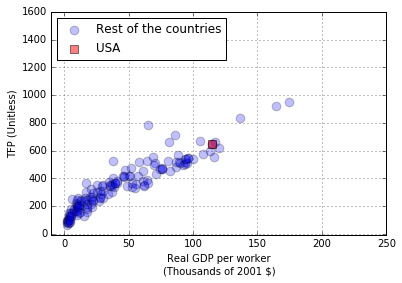

In [129]:
# Construct a scatter plot of TFP against real GDP per worker with:
#    1. All countries as blue circles, size 75, opacity (alpha) 0.25, label: 'All countries'
#    2. USA as red square, size 75, opacity (alpha) 0.5, label='USA'
#    3. Add a legend in the upper left corner with scatterpoints=1
#    4. x-axis limits: [-10,250]
#    4. y-axis limits: [-10,1600]
#    6. x-axis label: 'Real GDP capital per worker\n(Thousands of 2001 $)'
#    7. y-axis label: 'TFP (Unitless))'
#    8. Add a grid if you'd like

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['gdp_pw'], df['tfp'],s=75,alpha=0.25,label='Rest of the countries')
ax.scatter(df['gdp_pw'].loc['USA'],df['tfp'].loc['USA'],marker='s',c='r',s=75,alpha=0.5,label='USA')
ax.legend(scatterpoints=1,loc='upper left')
ax.set_xlim([-10,250])
ax.set_ylim([-10,1600])
ax.set_xlabel('Real GDP per worker\n(Thousands of 2001 $)')
ax.set_ylabel('TFP (Unitless)')
ax.grid()

## Estimate Relationship Between TFP and GDP per Worker

The Statsmodels module is an excellent tool for a broad range of statistical applications. Learn more about Statsmodels here: https://www.statsmodels.org/stable/index.html. We can use the module to estimate the relationship between TFP and GDP per worker in our data.

Since the scatter plot reveals some curvature in the relationship between TFP and GDP per worker, let's specifiy the linear regression model with the variables in logs:

\begin{align}
\log \text{TFP}_i & = \beta_0 + \beta_1 \log \text{GDP}_i + \epsilon_i
\end{align}

Once we've obtained the estimated coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can compute predicted values for TFP $\widehat{TFP}_i$ using by setting $\epsilon_i=0$ and solving the regression equation for TFP:

\begin{align}
\widehat{TFP}_i & = \exp\left(\hat{\beta}_0 + \hat{\beta}_1 \log \text{GDP}_i\right)
\end{align}

In [130]:
# Import the Statsmodels module
import statsmodels.api as sm

In [140]:
# Create a variable called 'y' that will be the dependent variable in the regression.
y = np.log(df['tfp'])

# Create a variable called 'x' that will be to the independent variable in the regression. 

x = np.log(df['gdp_pw'])

# Use the function sm.add_constant() to add a constant to x
x = sm.add_constant(x)

# Print the first five rows of x
print(x.head())

country_code
CAF    4.175866
BDI    4.626741
NER    4.422659
COD    4.408489
LBR    4.317057
         ...   
BRN    6.491198
NOR    6.424898
MAC    6.727620
ARE    6.824529
IRL    6.856335
Name: tfp, Length: 144, dtype: float64
              const    gdp_pw
country_code                 
CAF             1.0  0.648227
BDI             1.0  0.652621
NER             1.0  0.723029
COD             1.0  0.735024
LBR             1.0  0.908513


In [132]:
# Create an OLS model using Statsmodels
model = sm.OLS(y,x)

# Fit the OLS model to data
results = model.fit()


# Print the summary2() method of results to print summary of regression results:
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.909   
Dependent Variable: tfp              AIC:                -88.0207
Date:               2020-06-23 15:15 BIC:                -82.0811
No. Observations:   144              Log-Likelihood:     46.010  
Df Model:           1                F-statistic:        1433.   
Df Residuals:       142              Prob (F-statistic): 4.44e-76
R-squared:          0.910            Scale:              0.031338
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const        4.0640     0.0455   89.3637   0.0000   3.9741   4.1539
gdp_pw       0.4954     0.0131   37.8573   0.0000   0.4695   0.5213
-----------------------------------------------------------------
Omnibus:              6.046        Durbin-Watson:           1.876
Prob(Omnibus):   

Estimated coefficients are stored in the `params` attribute of `results`. Residuals of the regression are stored in the attribute `resid`. And predicted values of the dependent variable are stored in `fittedvalues`.

In [133]:
# Print estimated coefficients of linear regression
print(results.params)

const     4.064044
gdp_pw    0.495400
dtype: float64


Since p-value is small and the cofficient on log GDP per worker is approximately 0.5 so we can conclude that a one percent increase in GDP per worker increases TFP by one half of a percent.

In [134]:
# Print R-squared of the regression
print(results.rsquared)

0.9098512657662453


The R-squared of the regression is 0.905 and we can conclude that GDP per worker explains over 90 percent of the variation in TFP.

In [135]:
# Print the first five rows of residuals.
print(results.resid.head())

country_code
CAF   -0.209310
BDI    0.239388
NER    0.000426
COD   -0.019686
LBR   -0.197064
dtype: float64


In [136]:
# Print the mean of the residuals of the regression.
print(results.resid.mean())

3.676071792647741e-15


In [137]:
# Create a variable called 'yhat' equal to the fitted values of y:
yhat = results.fittedvalues

# Print the first five rows of yhat
print(yhat.head())

country_code
CAF    4.385176
BDI    4.387352
NER    4.422232
COD    4.428175
LBR    4.514121
dtype: float64


Recall that we can use estimated parameters can be used to compute out-of-sample predictions:

\begin{align}
\widehat{TFP}_i & = \exp\left(\hat{\beta}_0 + \hat{\beta}_1 \log \text{GDP}_i\right)
\end{align}

In [138]:
# Create variable called 'gdp_values' that is an array from 0.1 to 300
gdp_values = np.arange(0.1,300,0.001)

# Create variable called 'beta0' equal to the constant of the regression
beta0 = results.params['const']

# Create variable called 'beta1' equal to the coefficient on log GDP per worker from the regression
beta1 = results.params['gdp_pw']

# Create a variable called 'ahat' that is equal to the predicted values of TFP corresponding to gdp_values
ahat = np.exp(beta0 + beta1*np.log(gdp_values))

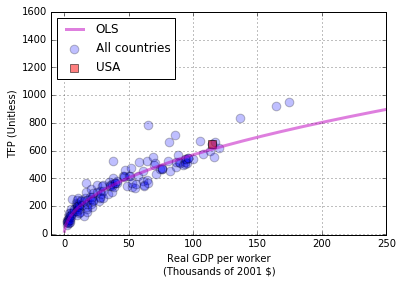

In [139]:
# Recreate the scatter plot of TFP against real GDP per worker with:
#    1. All features and settings from the previous plot
#    2. A plot of ahat against gdp_values; linewidth: 3, opacity: 0.5, label: 'OLS', color: magenta (c='m')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['gdp_pw'],df['tfp'],s=75,alpha=0.25,label='All countries')
ax.scatter(df['gdp_pw'].loc['USA'],df['tfp'].loc['USA'],marker='s',c='r',s=75,alpha=0.5,label='USA')
ax.plot(gdp_values,ahat,c='m',lw=3,alpha=0.5,label='OLS')
ax.legend(scatterpoints=1,loc='upper left')
ax.set_xlim([-10,250])
ax.set_ylim([-10,1600])
ax.set_xlabel('Real GDP per worker\n(Thousands of 2001 $)')
ax.set_ylabel('TFP (Unitless)')
ax.grid()

#### We should have a better understanding about FTP and its relationship with other factors by now. Let's come back to our RBC model.

# Model prepration

#### First, we need to derive our equations from above and get to equilibrium conditions.


\begin{align}
0 & = \beta\left[\frac{\alpha A_{t+1}K_{t+1}^{\alpha-1}L_{t+1}^{1-\alpha} +1-\delta_d }{C_{t+1}}\right] - \frac{1}{C_t}\\
0 & = \frac{(1-\alpha)A_tK_t^{\alpha}L_t^{-\alpha}}{C_t} - \frac{\varphi}{1-L_t}\\
0 & = A_t K_t^{\alpha}L_t^{1-\alpha} - Y_t\\
0 & = C_t + K_(t+1) - (1-{\delta}_k)K_t + D_t+1 - (1-{\delta}_d)D_t\\
0 & = \rho \log A_t - \log A_{t+1}
\end{align}


In [8]:
# Importing Nondurable Goods Data from the Federal Reserce at St. Louis, setting dates (first column) as 
# Index, seperating the columns, skiping other information on the webstie, and formating the dates. 

# Nondurable goods
df = pd.read_csv('https://fred.stlouisfed.org/data/PCND.txt',index_col=0,sep='\s+',skiprows=14,parse_dates = True)

# Durable goods
df2 = pd.read_csv('https://fred.stlouisfed.org/data/PCDG.txt',index_col=0,sep='\s+',skiprows=14,parse_dates = True)

# Replacing 'VALUE' columns name from respective data 
df.rename(columns={'VALUE': 'PCND'}, inplace=True)
df2.rename(columns={'VALUE': 'PCDG'}, inplace=True)

Text(0.5, 1.0, 'Ratio of Nondurable goods over Durable goods')

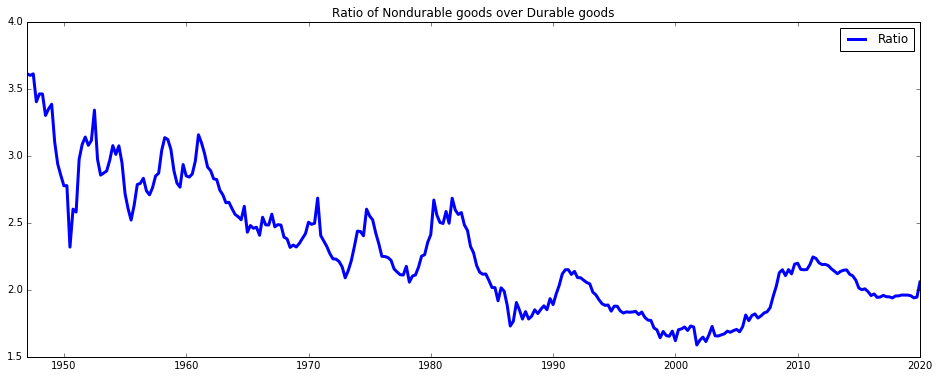

In [9]:
# Adding the durable goods data into the dataframe for non-durable goods

df['PCDG']=df2['PCDG']
df['DGND']=df['PCDG']+df['PCND']

# Adding a column for the ratio of nondurable goods to durable goods 

df['ratio']=df['PCND']/df['PCDG'] 

# Setting the graph figure size
plt.figure(figsize=(16,6))

# Ploting the ratio of nondurable goods to durable goods over time

plt.plot(df['ratio'], lw=3, label="Ratio")

# Inserting the ledgend for the graph 
plt.legend()
plt.title("Ratio of Nondurable goods over Durable goods")

In [10]:
# Finding the avrage of ratio for nondurable goods to durable goods 

print("Average Ratio=",np.round(np.average(df['ratio']),decimals=4))

Average Ratio= 2.2846


In [11]:
#Setting a variable for the avrage ratio

c_d=(np.average(df['ratio'])) 

In [12]:
# Storing the given parameter values into the a panda series 
parameters = pd.Series()
parameters['beta'] = 0.995
parameters['phi'] = 2.034915
parameters['alpha'] = 0.35
parameters['delta_k'] = 0.025
parameters['delta_d'] = 0.25
parameters['rho'] = 0.75
parameters['sigma_squared']= 0.006

# Finding eta(n) value with respect to the First order condition for the durable goods
parameters['n'] = (parameters.beta**-1-1+parameters.delta_d)/c_d
print(parameters)

beta             0.995000
phi              2.034915
alpha            0.350000
delta_k          0.025000
delta_d          0.250000
rho              0.750000
sigma_squared    0.006000
n                0.111628
dtype: float64


C:\Users\phongleh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [49]:
# Define a function to find the equlibrium conditions for the model using the FOCs
# This function be will initialized later using linearsolve module

def equilibrium_equations(variables_forward,variables_current,parameters):
    # Parameters
    p = parameters
    # Current variables.
    cur = variables_current
    # Forward variables. 
    fwd = variables_forward

    # Euler equation for Capital
    euler_equation = p.beta*(p.alpha*fwd.a*fwd.k**(p.alpha-1)*fwd.l**(1-p.alpha)+1-p.delta_k)/(fwd.c) - 1/cur.c
    
    # Euler equation for Durable Goods
    
    # Labor-leisure choice
    labor_leisure = (1-p.alpha)*(cur.a)*(cur.k**p.alpha)*cur.l**(-p.alpha)/cur.c - p.phi/(1-cur.l)
    
    # Production function
    production_function = cur.a*cur.k**p.alpha*cur.l**(1-p.alpha) - cur.y
    
    # Market clearing
    market_clearing = cur.c+fwd.k-(1-p.delta_k)*cur.k+fwd.d-(1-p.delta_d)*cur.d -cur.y
    
    # Exogenous tfp
    tfp_process = p.rho*np.log(cur.a) - np.log(fwd.a)
    durable_goods = p.beta*(1-p.delta_d)/fwd.c+(p.n/fwd.d)-1/cur.c


    #stacking the equations 
    return np.array([
        euler_equation,
        durable_goods,
        labor_leisure,
        production_function,
        market_clearing,
        tfp_process
        ])


In [50]:
# Create variable called 'varNames' that stores the variable names in a list with state variables ordered first
varNames = ['a','k','d','y','c','l']

# Create variable called 'shockNames' that stores an exogenous shock name for each state variable.
shockNames = ['e_a','e_k', 'e_d']

In [51]:
# Initializing the model using linearsolve module: state variables orderd first, and excogenous shocks for each state variables
model = ls.model(equations = equilibrium_equations,
                 n_states=3,
                 var_names=varNames,
                 shock_names=shockNames,
                 parameters=parameters)


In [52]:
# Solve the steady state for the estimated variables from the variable guess using .compute_ss()
guess = [1,20,0.5,0.5,1,0.5]
model.compute_ss(guess)
print(model.ss)


a     1.000000
k    14.587879
d     0.351438
y     1.251437
c     0.798880
l     0.333499
dtype: float64


In [53]:
# Linear approximation of the model using the .approximate_and_solve()
model.approximate_and_solve()
print(model.approximated())

Log-linear equilibrium conditions:

0.0374·a[t+1]-0.0243·k[t+1]-1.2518·c[t+1|t]+0.0243·l[t+1|t] = -1.2518·c[t]

                             -0.3176·d[t+1]-0.9341·c[t+1|t] = -1.2518·c[t]

                                                          0 = -3.0531·a[t]-1.0686·k[t]+3.0531·c[t]+2.5963·l[t]

                                                          0 = -1.2514·a[t]-0.438·k[t]+1.2514·y[t]-0.8134·l[t]

                               14.5879·k[t+1]+0.3514·d[t+1] = 14.2232·k[t]+0.2636·d[t]+1.2514·y[t]-0.7989·c[t]

                                                    -a[t+1] = -0.75·a[t]


In [54]:
# Finding the impulse response to the shocks. In this case, 1% shock in TFP.
model.impulse(T=41,t0=5,shocks=[0.01,0,0])

# Results of first 10 period
print(model.irs['e_a'].head(10))

    e_a         a         k         d         y         c         l
0  0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1  0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2  0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
3  0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
4  0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
5  0.01  0.010000  0.000000  0.000000  0.016465  0.001543  0.009945
6  0.00  0.007500  0.001315  0.000550  0.012608  0.001880  0.007150
7  0.00  0.005625  0.002241  0.001225  0.009701  0.002103  0.005064
8  0.00  0.004219  0.002883  0.001696  0.007511  0.002241  0.003512
9  0.00  0.003164  0.003315  0.002018  0.005858  0.002317  0.002360


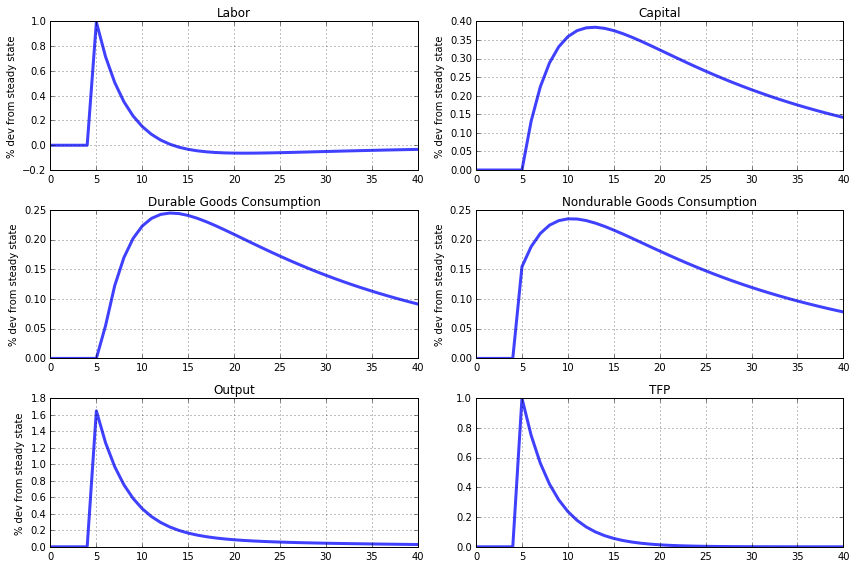

In [59]:
# Create figure. 

fig = plt.figure(figsize=(12,8))

# Create axis, with 3 rows and two columns

ax1 = fig.add_subplot(3,2,1)
(model.irs['e_a']['l']*100).plot(ax=ax1,lw=3,alpha=0.75,title='Labor',grid=True)
ax1.set_ylabel('% dev from steady state')

ax2 = fig.add_subplot(3,2,2)
(model.irs['e_a']['k']*100).plot(ax=ax2,lw=3,alpha=0.75,title='Capital',grid=True)
ax2.set_ylabel('% dev from steady state')

ax3 = fig.add_subplot(3,2,3)
(model.irs['e_a']['d']*100).plot(ax=ax3,lw=3,alpha=0.75,title='Durable Goods Consumption',grid=True)
ax3.set_ylabel('% dev from steady state')

ax4 = fig.add_subplot(3,2,4)
(model.irs['e_a']['c']*100).plot(ax=ax4,lw=3,alpha=0.75,title='Nondurable Goods Consumption',grid=True)
ax4.set_ylabel('% dev from steady state')
ax5 = fig.add_subplot(3,2,5)
(model.irs['e_a']['y']*100).plot(ax=ax5,lw=3,alpha=0.75,title='Output',grid=True)
ax5.set_ylabel('% dev from steady state')

ax6 = fig.add_subplot(3,2,6)
(model.irs['e_a']['a']*100).plot(ax=ax6,lw=3,alpha=0.75,title='TFP',grid=True)


fig.tight_layout()

With 1% shock in TFP in period 5:
- Labor increases by 1 percent and drops tremendously then slowly returns to steady state.
- Output increases by 1.6 percent and drops tremendously then slowly returns to steady state.
- Consumptions increaes approximately 0.25 percent and slowly returns to steady state
- Capital increase approximately 0.35 percent and slowly returns to steady state


In [ ]:
# TFP captures the effects of changes in technology, institution and other productivity shocks.